<a id='up'></a>
#### Проект состоит из двух частей:
<a href='#up1'>Часть 1. Приоритизация гипотез</a><br>
<a href='#up2'>Часть 2. Анализ A/B-теста</a>

<a id='up1'></a>
# Часть 1. Приоритизация гипотез

Необходимо приоритизировать список гипотез для увеличения выручки.

### Описание данных:

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Файл hypothesis.csv:
<ul>
 <li>Hypothesis — краткое описание гипотезы;</li>
 <li>Reach — охват пользователей по 10-балльной шкале;</li>
 <li>Impact — влияние на пользователей по 10-балльной шкале;</li>
 <li>Confidence — уверенность в гипотезе по 10-балльной шкале;</li>
 <li>Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.</li></ul>


<a href='#start1'>Загрузка данных и подготовка к анализу.</a><br>
Задача:
<ul>
 <li><a href='#step11'>Применение фреймворка ICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.</a></li>
 <li><a href='#step12'>Применение фреймворка RICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.</a></li>
 <li><a href='#step13'>Фиксация и анализ изменений приоритизации гипотез при применении RICE вместо ICE.</a></li></ul>


<a id='start1'></a>
## Загрузка данных и подготовка к анализу

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date
from scipy import stats as st
import seaborn as sns
import scipy.stats as stats

#импорт необходимых библиотек

In [2]:
hypothesis = pd.read_csv(r'C:\Users\79313\7\hypothesis.csv')


In [3]:
pd.set_option('display.max_colwidth', None)
#настройка для вывода всех данных в строке
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Гипотезы и оценки понятны.

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Форматы данных корректные.

<a href='#up1'>Наверх</a><br>

<a id='step11'></a>
## Примение фреймворка ICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета

Описание метода:<br>
Impact * Confidence	/ Efforts<br>

Где:<br>
<b>Impact</b> — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;<br>
<b>Confidence</b> — насколько вы уверены, что это изменение повлияет на пользователей именно так;<br>
<b>Efforts</b> — сколько стоит протестировать эту гипотезу.<br>

In [5]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']).astype(int)
#добавляю столбец с расчётом ICE
display(hypothesis[['Hypothesis',"ICE"]].sort_values(by='ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1


Наиболее перспективные гипотезы 8, 0, 7 и 6.

<a href='#up1'>Наверх</a><br>

<a id='step12'></a>
## Примение фреймворка RICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета

Описание метода:<br>
Reach * Impact * Confidence	/ Efforts<br>

Где:<br>
<b>Reach</b> — скольких пользователей затронет изменение, которое вы хотите внести;<br>
<b>Impact</b> — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;<br>
<b>Confidence</b> — насколько вы уверены, что это изменение повлияет на пользователей именно так;<br>
<b>Efforts</b> — сколько стоит протестировать эту гипотезу.<br>

In [6]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']).astype(int)
#добавляю столбец с расчётом RICE
display(hypothesis[['Hypothesis',"RICE"]].sort_values(by='RICE', ascending = False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40
8,"Запустить акцию, дающую скидку на товар в день рождения",16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


Наиболее перспективные гипотезы 7, 2, 0 и 6.

<a href='#up1'>Наверх</a><br>

<a id='step13'></a>
## Фиксация и анализ изменений приоритизации гипотез при применении RICE вместо ICE.

In [7]:
display(hypothesis.sort_values(by='RICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


После применения RICE вместо ICE гипотеза 8 (Запустить акцию, дающую скидку на товар в день рождения) переместилось с первого места по перспективности на четвёртое с занчительным снижением значения показателя. Это произошло из-за того, что количество пользователей, которое затронет изменение оценено всего в 1 балл из 10 (что выглядит корректно, поскольку действие гипотезы распространяется только на пользователей, у которых День Рождения).<br>

Также после применения RICE вместо ICE гипотеза 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) поднялась с третьего на первое место со значительным отрывом по значению показателя из-за максимальной оценки охвата 10 баллов (т.к. форма подписки будет размещена на всех основных страницах, соответственно у пользователя не будет возможности её не увидеть).

<a href='#up1'>Наверх</a><br>

<a id='up2'></a>
# Часть 2. Анализ A/B-теста

<a href='#up'>К выбору части проекта</a><br>

Проведен A/B-тест и получены результаты, которые описаны в файлах orders.csv и visitors.csv.

### Описание данных:

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Файл orders.csv:
<ul>
 <li>transactionId — идентификатор заказа;</li>
 <li>visitorId — идентификатор пользователя, совершившего заказ;</li>
 <li>date — дата, когда был совершён заказ;</li>
 <li>revenue — выручка заказа;</li>
 <li>group — группа A/B-теста, в которую попал заказ.</li>
    </ul>
    
Файл visitors.csv:
<ul>
 <li>date — дата;</li>
 <li>group — группа A/B-теста;</li>
 <li>visitors — количество пользователей в указанную дату в указанной группе A/B-теста.</li>
</ul>

Анализ A/B-теста:<br>
<a href='#start2'>Загрузка данных и подготовка к анализу</a>
1. <a href='#step21'>Построение графика кумулятивной выручки по группам.</a>
2. <a href='#step22'>Построение графика кумулятивного среднего чека по группам.</a>
3. <a href='#step23'>Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.</a>
4. <a href='#step24'>Построение графика кумулятивной конверсии по группам.</a>
5. <a href='#step25'>Построение графика относительного изменения кумулятивной конверсии группы B к группе A.</a>

<a href='#stepinside'>Промежуточный вывод.</a>

6. <a href='#step26'>Построение точечного графика количества заказов по пользователям.</a>
7. <a href='#step27'>Расчёт 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.</a>
8. <a href='#step28'>Пострение точечного графика стоимостей заказов.</a>
9. <a href='#step29'>Расчёт 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.</a>
10. <a href='#step210'>Расчёт статистической значимости различий в конверсии между группами по «сырым» данным.</a>
11. <a href='#step211'>Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.</a>
12. <a href='#step212'>Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным.</a>
13. <a href='#step213'>Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.</a>
14. <a href='#step214'>Принятие решения по результатам теста.</a><br>

<a id='start2'></a>
## Загрузка данных и подготовка к анализу

#### Файл orders

In [8]:
orders = pd.read_csv(r'C:\Users\79313\7\orders.csv')

In [9]:
display(orders.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Файл прочитан корректно.

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Необходимо изменение типа данных в столбце date на формат даты datetime64.

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#изменяю тип данных в столбце

In [12]:
print('Всего дубликатов:',orders.duplicated().sum()) #проверка количества дубликатов

Всего дубликатов: 0


Далее проверяю распределения (по выручке и по группам) на нормальность по критерию Шапиро-Уилка.

In [13]:
sample_1 = orders.query('group == "A"')['revenue']

alpha = .05 # критический уровень статистической значимости

results = st.shapiro(sample_1)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)
print('Для группы А:')

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  1.739703399801917e-34
Для группы А:
Отвергаем нулевую гипотезу: распределение не нормально


In [14]:
sample_1 = orders.query('group == "B"')['revenue']

alpha = .05 # критический уровень статистической значимости

results = st.shapiro(sample_1)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)
print('Для группы В:')

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  0.0
Для группы В:
Отвергаем нулевую гипотезу: распределение не нормально


Данные по выручке в обоих группах распределены не нормально, это необходимо учитывать для дальнейших расчётов.

#### Файл visitors

In [15]:
visitors = pd.read_csv(r'C:\Users\79313\7\visitors.csv')

In [16]:
display(visitors.head(10))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Файл прочитан корректно.

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Необходимо изменение типа данных в столбце date на формат даты datetime64.

In [18]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#изменяю тип данных в столбце

In [19]:
print('Всего дубликатов:',visitors.duplicated().sum()) #проверка количества дубликатов

Всего дубликатов: 0


Таким образом файлы подготовлены к работе.

<a href='#up2'>Наверх</a><br>

<a id='step21'></a>
## Построение графика кумулятивной выручки по группам

<font color=grey>Выводы и предположения.</font>

In [20]:
datesGroups = orders[['date','group']].drop_duplicates()
display(datesGroups.head(3))
# создаю массив уникальных пар значений дат и групп теста

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A


In [21]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':pd.Series.nunique, 'visitorId':pd.Series.nunique, 'revenue':'sum'})\
, axis=1).sort_values(by=['date','group'])

In [22]:
display(ordersAggregated.head())

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Аггрегирую по датам и группам А/В теста количество транзакций, уникальных пользователей и сумму выручки.

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [24]:
display(visitorsAggregated.head())

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Аггрегирую по датам и группам А/В теста количество посетителей.

In [25]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [26]:
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Объединяю данные в единую таблицу и переименовываю столбцы.

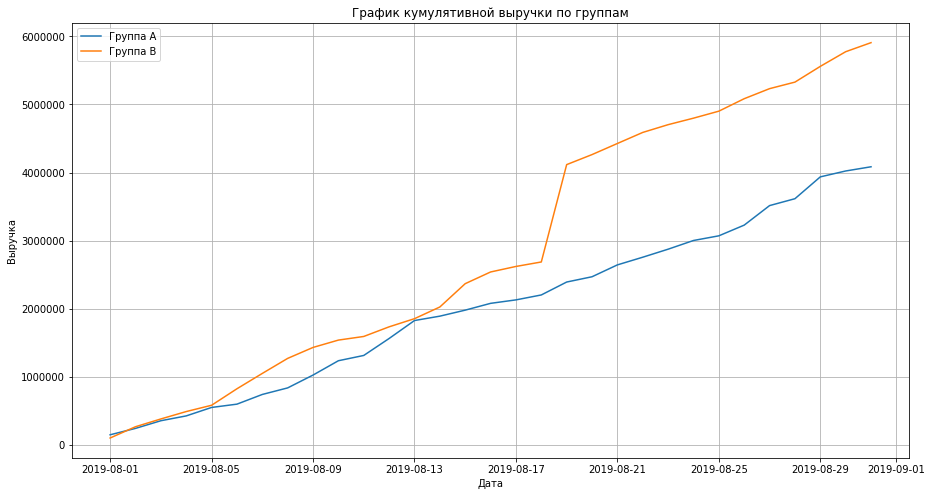

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 8))
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')

plt.legend();

### Выводы и предположения:

Выручка одновременно увеличивается по обоим группам в течении всего теста. Выручка по группе В стабильно выше, чем по группе А.<br>
В точке 2019-08-19 выручка по группе В резко растёт, что может свидетельствовать либо и вспелске заказов, либо о появлении дорогово заказа, что является выбросом и необходимо учитывать.


<a href='#up2'>Наверх</a><br>

<a id='step22'></a>
## Построение графика кумулятивного среднего чека по группам

<font color=grey>Выводы и предположения.</font>

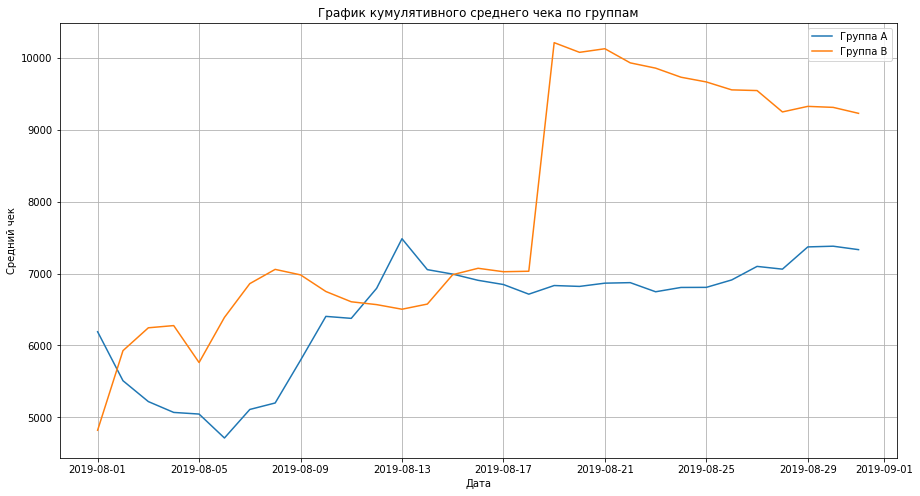

In [28]:
plt.figure(figsize=(15, 8))
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(True)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа B')
plt.legend();

### Выводы и предположения:

На средний чек группы В также влияет выброс от 2019-08-19, показатель возрастает с 7000 до 10000 а затем снижается.
Единой динамики по среднему чеку установить не удалось, сказываются колебания по обоим группам.
Необходимо больше данных для анализа этого показателя.

<a href='#up2'>Наверх</a><br>

<a id='step23'></a>
## Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

<font color=grey>Выводы и предположения.</font>

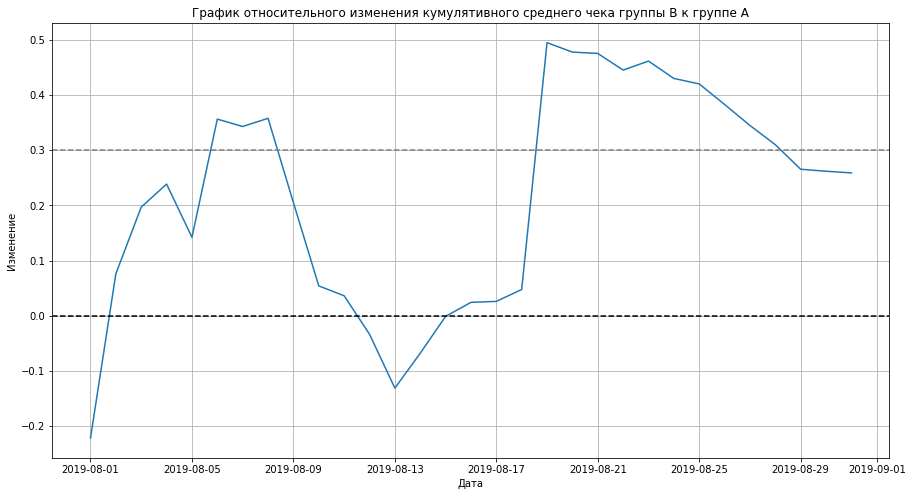

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',\
                                    right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 8))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.grid(True)


# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],\
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.3, color='grey', linestyle='--');

<a id='old_revenue'></a>
<a href='#new_revenue'>Ссылка для перехода на график с очищенными данными</a><br>

### Выводы и предположения:

График нелинейный, есть большое количество различий между сегментами, снова оказывает влияние выброс от 2019-08-19.
График также подтверждает, что средний чек по группе В выше, чем по группе А, за исключение даты 2019-08-13.

<a href='#up2'>Наверх</a><br>

<a id='step24'></a>
## Построение графика кумулятивной конверсии по группам

<font color=grey>Выводы и предположения.</font>

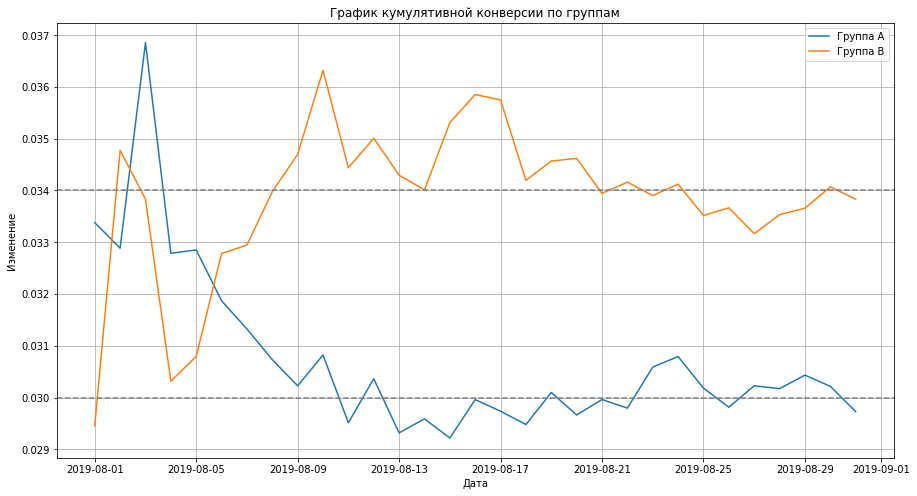

In [30]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.figure(figsize=(15, 8))
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.grid(True)

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.axhline(y=0.034, color='grey', linestyle='--');
plt.axhline(y=0.03, color='grey', linestyle='--');
plt.legend();

### Выводы и предположения:

Конверсия по группе В выше, чем по группе А.<br>
Графики продолжают колебаться и не зафиксировались, однако тенденция на превышение конверсии В сохранаяется.

<a href='#up2'>Наверх</a><br>

<a id='step25'></a>
## Построение графика относительного изменения кумулятивной конверсии группы B к группе A

<font color=grey>Выводы и предположения.</font>

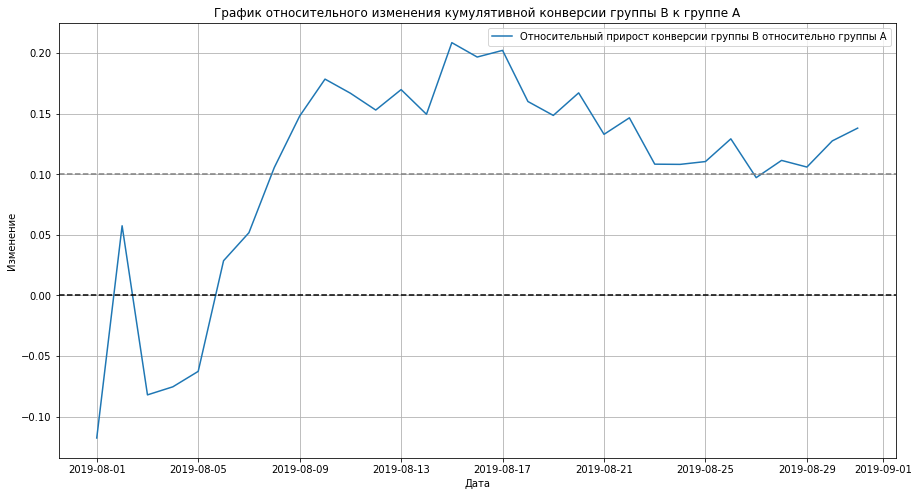

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],\
                                left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 8))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.grid(True)


plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--');
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

<a id='old_conversion'></a>
<a href='#new_conversion'>Ссылка для перехода на график с очищенными данными</a><br>

### Выводы и предположения:

Конверсия по группе В выше, чем по группе А.<br>
Тенденция на превышение конверсии В сохраняется.<br>
Однако график продолжает колебаться и не зафиксировался.<br>

<a href='#up2'>Наверх</a><br>

<a id='stepinside'></a>
## Промежуточный вывод

Предварительно результаты группы В выше, чем группы А.<br>
Однако:
1. На графиках куммулятивной выручки и куммулятивного среднеге чека присутствует скачок от 2019-08-19
2. На графике относительного изменения кумулятивного среднего чека группы B к группе A после скачка от 2019-08-19 начинается падение показателей группы В.
3. На всех графиках показания колеблятся, нет единого тренда.

Исходя из этого сейчас делать какие-либо выводы по тесту нельзя.  Необходимо проанализировать аномалии.

<a id='step26'></a>
## Построение точечного графика количества заказов по пользователям

<font color=grey>Выводы и предположения.</font>

In [32]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [33]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)\
.agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Для построения графика создаю таблицу количеством визитов по каждому пользователю.

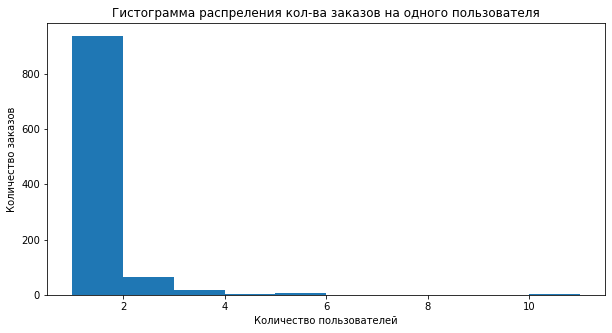

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Гистограмма распреления кол-ва заказов на одного пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.hist(ordersByUsers['orders']);
#строю гистограмму распределения

Большинство пользователей совершает один заказ, однако есть пользователи, совершившие до 11 заказов.

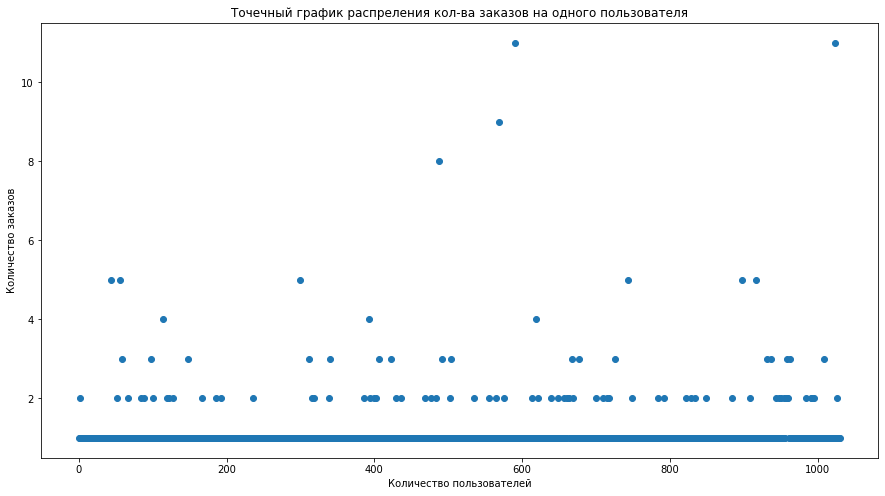

In [35]:
x_values = pd.Series(range(0,len(ordersByUsers)))
#создаю массив с общим количеством пользователей

plt.figure(figsize=(15, 8))
plt.title('Точечный график распреления кол-ва заказов на одного пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders']);
#строю график распределения scatter

Также есть большое количество пользователей с 2 и 3 заказами.<br>
Доля пользователей с количеством заказов более 5 - незначительна по графику, однако этот показатель требует дополнительной проверки.

<a href='#up2'>Наверх</a><br>

<a id='step27'></a>
## Расчёт 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей


In [36]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей совершили более 4 заказов.<br>
Принимаю за чистые данные пользоваталей, которые совершили не более 2 заказов.

<a href='#up2'>Наверх</a><br>

<a id='step28'></a>
## Построение точечного графика стоимостей заказов

<font color=grey>Выводы и предположения.</font>

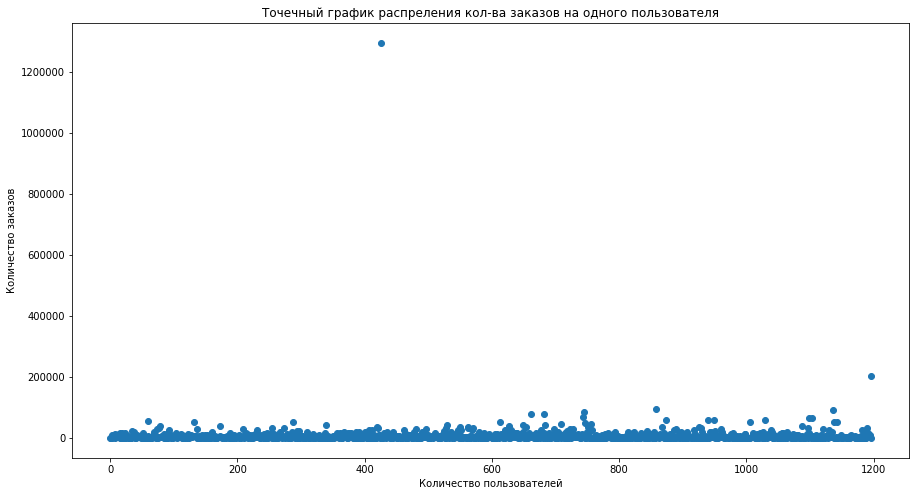

In [37]:
xx_values = pd.Series(range(0,len(orders['revenue'])))
#создаю массив с общим количеством пользователей

plt.figure(figsize=(15, 8))
plt.title('Точечный график распреления кол-ва заказов на одного пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.scatter(xx_values, orders['revenue']);
#строю график распределения scatter

Большая часть заказов в диапазоне до 50 000, однако есть заказы более 1 200 000, которые могут оказывать существенное влияние на средний чек.

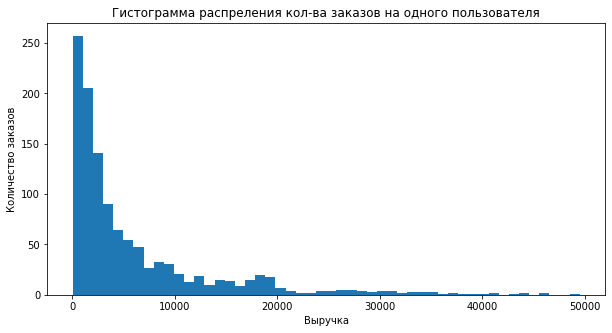

In [38]:
plt.figure(figsize=(10, 5))
plt.title('Гистограмма распреления кол-ва заказов на одного пользователя')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.hist(orders.query('revenue < 50000')['revenue'], bins=50);
#строю гистограмму распределения

Уменьшив диапазон значение на диаграмме менее 50 000, наблюдаю, что большая часть заказов до 10 000.

<a href='#up2'>Наверх</a><br>

<a id='step29'></a>
## Расчёт 95-й и 99-й перцентилей стоимости заказов. Выбер границы для определения аномальных заказов.


In [39]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов с выручкой более 28 000. И 1% заказов с выручкой более 58 233<br>
Принимаю за чистые данные заказы с выручкой не более 28 000.

<a href='#up2'>Наверх</a><br>

<a id='step210'></a>
## Расчёт статистической значимости различий в конверсии между группами по «сырым» данным

<font color=grey>Выводы и предположения.</font>

Для проверки статистической значимости необходимо подготовить выборки к проверке критерием Манна-Уитни.

In [40]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [41]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#формирую таблицу визитов по датам в группе А
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
#формирую куммулятивную таблицу визитов на дату в группе А

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#формирую таблицу визитов  по датам в группе В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#формирую куммулятивную таблицу визитов на дату в группе В


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#формирую таблицу заказов  по датам в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
#формирую куммулятивную таблицу визитов на дату в группе А

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
#формирую таблицу заказов  по датам в группе В

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
#формирую куммулятивную таблицу визитов на дату в группе В

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
#объединяю таблицы

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Формирую датафрейм data со следующими столбцами:
<ul>
 <li>date — дата;</li>
 <li>ordersPerDateA — количество заказов в выбранную дату в группе A;</li>
 <li>revenuePerDateA — суммарная выручка в выбранную дату в группе A;</li>
 <li>ordersPerDateB — количество заказов в выбранную дату в группе B;</li>
 <li>revenuePerDateB — суммарная выручка в выбранную дату в группе B;</li>
 <li>ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;</li>
 <li>revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;</li>
 <li>ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;</li>
 <li>revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;</li>
 <li>visitorsPerDateA — количество пользователей в выбранную дату в группе A;</li>
 <li>visitorsPerDateB — количество пользователей в выбранную дату в группе B;</li>
 <li>visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;</li>
 <li>visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.</li>
</ul>

In [42]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
display(ordersByUsersA.head())

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


Формирую таблицы для пользователей, которые заказывали хотя бы 1 раз, с указанием числа совершённых заказов.

In [43]:
sampleA = pd.concat([ordersByUsersA['orders'],\
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
display(sampleA.head(3))

sampleB = pd.concat([ordersByUsersB['orders'],\
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


0    1
1    1
2    1
Name: orders, dtype: int64

Создаю объекты sampleA и sampleB в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

Нулевая гипотеза: в конверсии в группах А и В нет различий.<br>
Для анализа использую непараметрический тест Уилкоксона-Манна-Уитни.

In [44]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное различие в конверсии между группами В и А: {0:.1%}".format(sampleB.mean()/sampleA.mean()-1))

P-value: 0.008
Относительное различие в конверсии между группами В и А: 13.8%


P-value меньше 0.05.<br>
Отвергаем нулевую гипотезу: разница конверсии в группах А и В статистически значима.<br>
Конверсия группы B выше конверсии группы A.

<a href='#up2'>Наверх</a><br>

<a id='step211'></a>
## Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

<font color=grey>Выводы и предположения.</font>

Нулевая гипотеза: в среднем чеке в группах А и В нет различий.<br>
Для анализа использую непараметрический тест Уилкоксона-Манна-Уитни.

In [45]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
    orders[orders['group']=='B']['revenue'])[1]))
print("Относительное различие в среднем чеке между группами В и А: {0:.1%}".format(orders[orders['group']=='B']\
    ['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.365
Относительное различие в среднем чеке между группами В и А: 25.9%


P-value больше 0.05.<br>
Не получилось отвергнуть нулевую гипотезу, вывод о различии средних чеков в группах А и В сделать нельзя.<br>
При этом средний чек группы B выше среднего чека группы A.

<a href='#up2'>Наверх</a><br>

<a id='step212'></a>
## Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным

<font color=grey>Выводы и предположения.</font>

За чистые данные ранее я принял:
<ul>
 <li>пользоваталей, которые совершили не более 2 заказов;</li>
 <li>заказы с выручкой не более 28 000.</li>
</ul>

In [46]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],\
                ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
#формирую массив с данными о пользователях с более 2 заказами

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
#формирую массив с данными о заказах с выручкой более 28 000 

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
#объединяю данные из двух массивов в один и удаляю дубликаты

print(abnormalUsers.head(5))
print('_______________________')
print('Количество аномальных пользоваталей:', abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
_______________________
Количество аномальных пользоваталей: (74,)


In [47]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]\
    ['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
display(sampleAFiltered.head(3))

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]\
    ['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

0    1
1    1
2    1
Name: orders, dtype: int64

Создаю массивы с чистыми данными.

Нулевая гипотеза: в конверсии в группах А и В очищенных от выбросов нет различий.<br>
Для анализа использую непараметрический тест Уилкоксона-Манна-Уитни.

In [48]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительное различие в конверсии между группами В и А: {0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.007
Относительное различие в конверсии между группами В и А: 17.3%


P-value меньше 0.05.<br>
Отвергаем нулевую гипотезу: разница конверсии в группах А и В очищенных от выбросов статистически значима.<br>
Конверсия группы B выше конверсии группы A.

#### Построение графика

In [49]:
orders_new = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

Формирую новый датасет с данными о заказах, в который не включаю аномальных пользователей.

In [50]:
ordersAggregated_new = datesGroups.apply(lambda x: orders_new[np.logical_and(orders_new['date'] <= x['date'], orders_new['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':pd.Series.nunique, 'visitorId':pd.Series.nunique, 'revenue':'sum'})\
, axis=1).sort_values(by=['date','group'])

In [51]:
cumulativeData_new = ordersAggregated_new.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_new.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [52]:
# считаем кумулятивную конверсию
cumulativeData_new['conversion'] = cumulativeData_new['orders']/cumulativeData_new['visitors']

# отделяем данные по группе A
cumulativeDataA_new = cumulativeData_new[cumulativeData_new['group']=='A']

# отделяем данные по группе B
cumulativeDataB_new = cumulativeData_new[cumulativeData['group']=='B']


Далее по аналогии формирую исходные данные для построения графика.

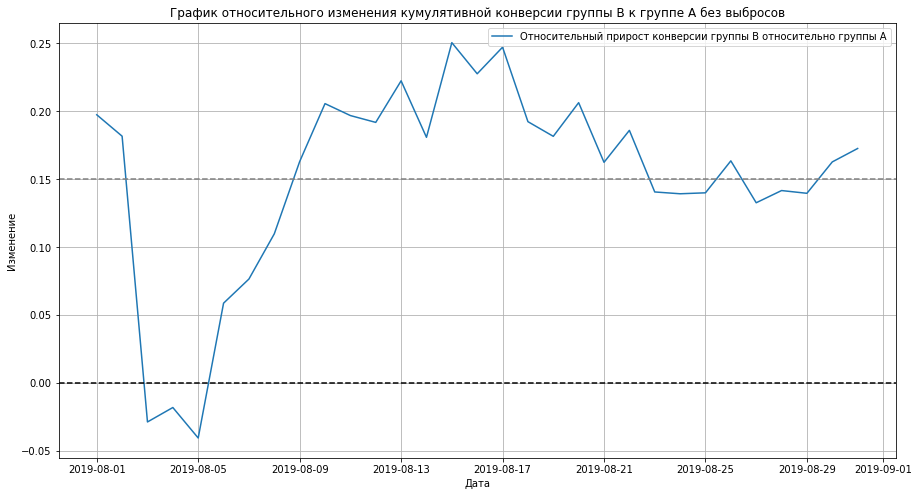

In [53]:
mergedCumulativeConversions_new = cumulativeDataA_new[['date','conversion']].merge(cumulativeDataB_new[['date','conversion']],\
                                left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 8))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A без выбросов')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.grid(True)


plt.plot(mergedCumulativeConversions_new['date'], mergedCumulativeConversions_new['conversionB']/mergedCumulativeConversions_new['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--');

<a id='new_conversion'></a>
<a href='#old_conversion'>Ссылка для перехода на график с сырыми данными</a><br>

Конверсия по группе В выше, чем по группе А.<br>
На очищенных данных прирост конверсии по группе В выше, чем по группе А.<br>
Тенденция на превышение конверсии В над А сохраняется.<br>
Однако график продолжает колебаться и не зафиксировался.<br>

<a href='#up2'>Наверх</a><br>

<a id='step213'></a>
## Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

<font color=grey>Выводы и предположения.</font>

Нулевая гипотеза: в среднем чеке в группах А и В очищенных от выбросов нет различий.<br>
Для анализа использую непараметрический тест Уилкоксона-Манна-Уитни.

In [54]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительное различие в среднем чеке между группами В и А: {0:.1%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value: 0.369
Относительное различие в среднем чеке между группами В и А: -2.0%


P-value больше 0.05.<br>
Не получилось отвергнуть нулевую гипотезу, вывод о различии средних чеков в группах А и В очищенных от выбросов сделать нельзя.<br>
При этом средний чек группы B ниже среднего чека группы A.

#### Построение графика

In [55]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_new = cumulativeData_new[cumulativeData_new['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_new = cumulativeData_new[cumulativeData_new['group']=='B'][['date','revenue', 'orders']]

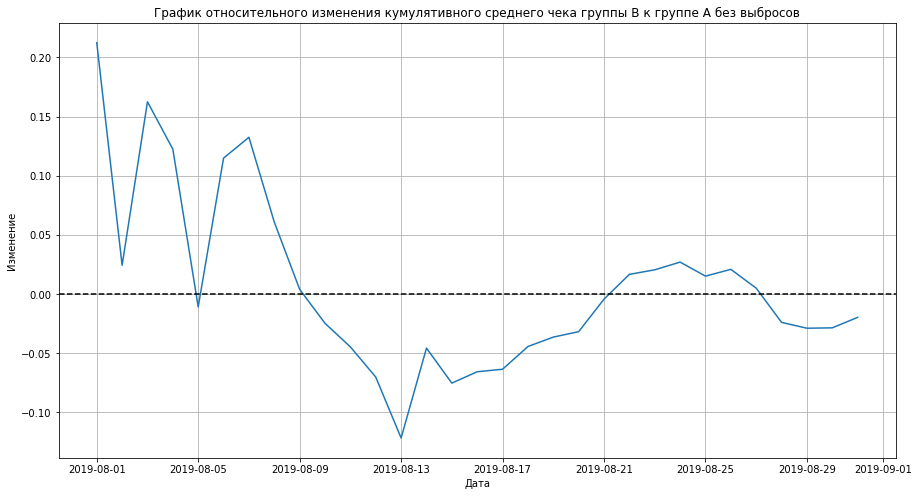

In [56]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue_new = cumulativeRevenueA_new.merge(cumulativeRevenueB_new, left_on='date',\
                                    right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 8))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A без выбросов')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.grid(True)


# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue_new['date'],\
(mergedCumulativeRevenue_new['revenueB']/mergedCumulativeRevenue_new['ordersB'])/(mergedCumulativeRevenue_new['revenueA']/mergedCumulativeRevenue_new['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

<a id='new_revenue'></a>
<a href='#old_revenue'>Ссылка для перехода на график с сырыми данными</a><br>

График нелинейный, есть большое количество различий между сегментами, нет единого тренда.<br>
Средний чек регулярно меянется по группам.

<a href='#up2'>Наверх</a><br>

<a id='step214'></a>
## Принятие решения по результатам теста

<font color=grey>Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.</font>

Полученный результат:
<ul>
 <li>Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.</li>
 <li>График относительного изменения кумулятивной конверсии сообщает, что  что результаты группы B лучше группы A, график имеет колебания, однако в целом тренд сохраняется.</li>
 <li>По среднему чеку как по сырым данным, так и после удаления аномалий нет статистически значимого различия. Кроме того по сырым данным средний чек выше в группе В, а после удаления аномалий в группе А.</li>
 <li>График относительного изменения кумулятивного среднего чека колеблется и не позволяет сделать выводов.</li>
</ul>

Решение:
Остановить тест. Признать успешным, зафиксировать повышение конверсии в группе В.

<a href='#up2'>Наверх</a><br>